## Question 2 (50 points)

***This question consists of pseudocode, extracting a frequency numerically, and plotting. Pull code from homework and midterms to optimize your effort.***

For the following potential energy for an anharmonic oscillator, we will create a figure that shows the angular frequency, $\omega$ versus the initial amplitude of the oscillator $Q_0$.

### The potential energy (notice the minus sign on the fourth-order term)

$$ \Delta U = \frac{1}{2} K Q^2 - \frac{1}{4} D Q^4 + \frac{1}{6} \Phi Q^6 $$

### Constrained parameters

Take $K = 1$, $D=2.4$, $\Phi=1$, and $M = 1$.

### Plotting constraints

Plot a range of initial displacements spanning $Q_0 = \pm 1.7$ (see the representative plot below)

### Extracting the angular frequency

Recall that in the second midterm and subsequent weeks we developed a strategy for a variant of this problem which used the following steps:

1. Solve the differential equation for $Q(t)$ for initial value $Q_0$ (take the initial velocity to be zero);
2. Use `ipywidgets` to explore this solution in a figure and extract approximate values of the period $T$ as a function of $Q_0$. We found $T$ by getting the time from peak to peak or valley to valley;
3. Interpolate the approximate values of $T$;
4. Use in interpolated values of $T$ as a guess for a minima finding algorithm;
5. Convert the extracted values of $T$ to angular frequency by $\omega=\frac{2\pi}{T}$.
6. To deal with the stationary solutions (e.g. $Q_0 = 0$), we used analytic results for the angular frequency by taking using the formula $\omega = \sqrt{\frac{1}{M}\frac{d^2\Delta U}{d Q^2}}$.

***This means you should be able to copy and paste most of the code from the midterm and subsequent weeks to optimize your effort***

### Steps to construct the plot

1. Write pseudocode to set up your strategy (**10 points**);
2. Expand your pseudocode to include INPUT, OUTPUT, and TESTS that you could use to program each custom function (**10 points**);
3. Write those functions and test them (**10 points**);
4. Combine your custom functions for streamlined code and the plot of $\omega$ versus $Q_0$ (**10 points**);
5. Describe the plot in your own words (**10 points**).

### Plot of the potential energy

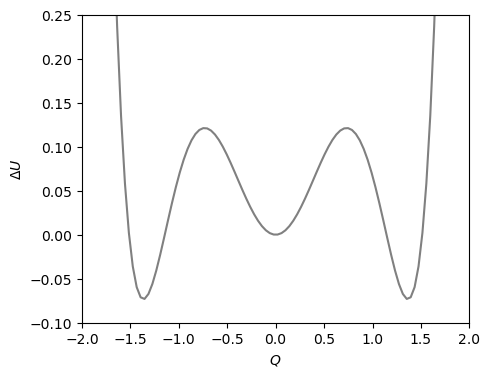

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# define potential function
def potential_energy(Q, K=1.0, D=2.4, Phi=1.0):
    return (1/2) * K * Q**2 - (1/4) * D * Q**4 + (1/6) * Phi * Q**6

# define mesh for plotting
Q_mesh = np.linspace(-2,2,100)
U_mesh = potential_energy(Q_mesh)

# construct figure
plt.figure(figsize=(5, 4))
plt.plot(Q_mesh, U_mesh, color="gray")
plt.xlabel("$Q$")
plt.ylabel("$\Delta U$")
plt.xlim(-2,2)
plt.ylim(-0.1,0.25)
plt.show()

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.signal import find_peaks
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Parameters
K = 1
D = 2.4
Phi = 1
M = 1

# Potential energy function
def delta_U(Q):
    return 0.5 * K * Q**2 - 0.25 * D * Q**4 + (1/6) * Phi * Q**6

# Equation of motion
def equation_of_motion(t, y):
    Q, Q_dot = y
    dQ_dt = Q_dot
    dQ_dot_dt = -(K * Q - D * Q**3 + Phi * Q**5) / M
    return [dQ_dt, dQ_dot_dt]

# Solve Q(t) for given Q0
def solve_Q_t(Q0, t_max=20, num_points=1000):
    t_eval = np.linspace(0, t_max, num_points)
    sol = solve_ivp(equation_of_motion, [0, t_max], [Q0, 0], t_eval=t_eval, method='RK45')
    return sol.t, sol.y[0]

# Extract period T
def extract_period(Q_t, t):
    peaks, _ = find_peaks(Q_t)
    if len(peaks) > 1:
        T = np.mean(np.diff(t[peaks]))
        return T
    return None

# Interpolate and plot
def interpolate_T(Q0_values, T_values):
    interpolation = interp1d(Q0_values, T_values, kind='cubic')
    return interpolation

# Angular frequency
def angular_frequency(T):
    return 2 * np.pi / T

# Analytical frequency
def analytic_omega():
    return np.sqrt(K / M)


In [3]:
# Interactive widget for Q(t)
def plot_Q_t(Q0):
    t, Q_t = solve_Q_t(Q0)
    plt.plot(t, Q_t)
    plt.xlabel("Time (t)")
    plt.ylabel("Displacement (Q)")
    plt.title(f"Q(t) for Q0 = {Q0}")
    plt.show()

widgets.interact(plot_Q_t, Q0=(-1.7, 1.7, 0.1));


interactive(children=(FloatSlider(value=2.220446049250313e-16, description='Q0', max=1.7, min=-1.7), Output())…

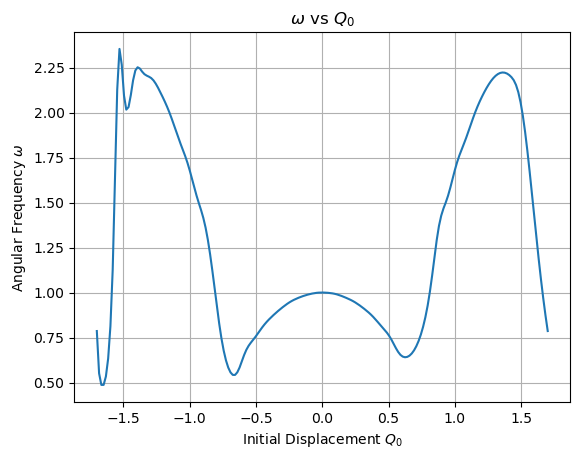

In [5]:
# Generate data
Q0_values = np.linspace(-1.7, 1.7, 50)
T_values = []

for Q0 in Q0_values:
    t, Q_t = solve_Q_t(Q0)
    T = extract_period(Q_t, t)
    T_values.append(T if T else np.nan)  # Append NaN if T extraction fails

# Remove invalid data points (where T is NaN)
valid_indices = ~np.isnan(T_values)  # Boolean mask for valid values
Q0_valid = Q0_values[valid_indices]
T_valid = np.array(T_values)[valid_indices]

# Interpolation and plot
if len(Q0_valid) > 1:  # Ensure there are enough points for interpolation
    interpolation = interp1d(Q0_valid, T_valid, kind='cubic')
    Q0_fine = np.linspace(-1.7, 1.7, 200)
    T_fine = interpolation(Q0_fine)
    omega_fine = angular_frequency(T_fine)

    # Plot omega vs Q0
    plt.plot(Q0_fine, omega_fine)
    plt.xlabel("Initial Displacement $Q_0$")
    plt.ylabel("Angular Frequency $\\omega$")
    plt.title("$\\omega$ vs $Q_0$")
    plt.grid(True)
    plt.show()
else:
    print("Not enough valid data points for interpolation.")


**Description of the plot**

Near $Q_0 = 0$ 

The higher order terms are neglected leaving only the quadtric term $\frac{1}{2}KQ^2$. At this ponit the angular frequency is roughly constant and is equal to $1$ given the parameters of $K=1$ and $M=1$

As $Q_0$ increases

Nonlinear effetcs become significant due to the quartc and sextic terms in the potential dominating. $\omega $ will dip then began to increase, reach its peak, and then began to decreases once more. The functioin spends more time at the turning points of motion because of the restoring force decreasing at $Q_0$ increases. Additionaly, the potentail will become flatter for larger discplacment, leading to slower oscillation and a longer period $T$.


*Key Insights*

Here are some important features to understand from the plot:

**Nonlinearity**- The devition in $\omega$ demonstrates how the nonlinearity in the potential influences the oscillatory motion.

**Amplitude Dependence**- Larger $Q_0$ correspond to larger oscillation amplitudes, which take the system into regions where force is not proportional to the displacement.


**Errors:** The plot seems to have Gibbs phenomenon occuring on the left side. I tried to account for this by using a lower-order interpolation method and while this did fix the overshoot it made the rest of the plot much messier. Additioanlly, the plot is not exactly symmetric